# DS Processing

In this tutorial, we demostrate how to do DS processing with the decorrelation CLI interface.
The input data for DS processing is prepared in [Load Data](./load_data.ipynb).

In [ ]:
!ls ./load_data

e.zarr	  lat.zarr  meta.toml  phi.zarr    rslc_pyramid  scratch
hgt.zarr  lon.zarr  n.zarr     range.zarr  rslc.zarr	 theta.zarr


## SHP selection

Here we use two sample Kolmogorov-Smirnov (KS) test for Spatially Homogenious Pixel (SHP) identification.

The output `pvalue` is the P-value for this test.
The smaller the p-value, the more likely the two sample are from same distribution, i.e.,
the more likely the two pixels are SHP to each other.

In [ ]:
import numpy as np
import moraine.cli as mc
import moraine as mr

In [ ]:
rslc = './load_data/rslc.zarr'
pvalue = './ds_processing/gix/ras_pvalue.zarr'
az_half_win = 5
r_half_win = 5
method = 'ks'

In [ ]:
logger = mc.get_logger()

In [ ]:
mc.shp_test(rslc,pvalue,
            az_half_win=az_half_win,r_half_win=r_half_win)

2024-06-06 18:36:26 - log_args - INFO - running function: shp_test
2024-06-06 18:36:26 - log_args - INFO - fetching args:
2024-06-06 18:36:26 - log_args - INFO - rslc = './load_data/rslc.zarr'
2024-06-06 18:36:26 - log_args - INFO - pvalue = './ds_processing/gix/ras_pvalue.zarr'
2024-06-06 18:36:26 - log_args - INFO - az_half_win = 5
2024-06-06 18:36:26 - log_args - INFO - r_half_win = 5
2024-06-06 18:36:26 - log_args - INFO - method = None
2024-06-06 18:36:26 - log_args - INFO - chunks = None
2024-06-06 18:36:26 - log_args - INFO - cuda = False
2024-06-06 18:36:26 - log_args - INFO - processes = None
2024-06-06 18:36:26 - log_args - INFO - n_workers = None
2024-06-06 18:36:26 - log_args - INFO - threads_per_worker = None
2024-06-06 18:36:26 - log_args - INFO - rmm_pool_size = 0.9
2024-06-06 18:36:26 - log_args - INFO - dask_cluster_arg = {}
2024-06-06 18:36:26 - log_args - INFO - fetching args done.
2024-06-06 18:36:26 - shp_test - INFO - hypothetic test method: ks
2024-06-06 18:36:26

Then we select SHP by setting a threshold on this Pvalue:

In [ ]:
import zarr
from matplotlib import pyplot as plt
import colorcet

In [ ]:
is_shp = './ds_processing/gix/ras_is_shp.zarr'
shp_num = './ds_processing/gix/ras_shp_num.zarr'
p_max = 0.05

In [ ]:
mc.select_shp(pvalue,is_shp,shp_num,p_max=p_max)

2024-06-06 18:36:45 - log_args - INFO - running function: select_shp
2024-06-06 18:36:45 - log_args - INFO - fetching args:
2024-06-06 18:36:45 - log_args - INFO - pvalue = './ds_processing/gix/ras_pvalue.zarr'
2024-06-06 18:36:45 - log_args - INFO - is_shp = './ds_processing/gix/ras_is_shp.zarr'
2024-06-06 18:36:45 - log_args - INFO - shp_num = './ds_processing/gix/ras_shp_num.zarr'
2024-06-06 18:36:45 - log_args - INFO - p_max = 0.05
2024-06-06 18:36:45 - log_args - INFO - chunks = None
2024-06-06 18:36:45 - log_args - INFO - processes = False
2024-06-06 18:36:45 - log_args - INFO - n_workers = 2
2024-06-06 18:36:45 - log_args - INFO - threads_per_worker = 2
2024-06-06 18:36:45 - log_args - INFO - dask_cluster_arg = {}
2024-06-06 18:36:45 - log_args - INFO - fetching args done.
2024-06-06 18:36:45 - zarr_info - INFO - ./ds_processing/gix/ras_pvalue.zarr zarray shape, chunks, dtype: (2500, 1834, 11, 11), (1000, 1834, 1, 1), float32
2024-06-06 18:36:45 - select_shp - INFO - starting da

The output `is_shp` indicate wheather a pixel in the window is a SHP to its center pixel.

In [ ]:
shp_num_zarr = zarr.open(shp_num,'r')
shp_num_data = shp_num_zarr[:]
shp_num_plot = mr.plot.ras_plot(shp_num_data)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
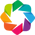

In [ ]:
import holoviews as hv
hv.extension('bokeh')
from bokeh.models import WheelZoomTool
from holoviews import opts

In [ ]:
shp_num_plot = shp_num_plot.redim(x=hv.Dimension('r', label='Range'), y=hv.Dimension('az',label='Azimuth'), z=hv.Dimension('n_shp',))

In [ ]:
shp_num_plot.opts(opts.Image(cmap='viridis',width=600, height=600, colorbar=True,
                          invert_yaxis=True,
                          default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],active_tools=['wheel_zoom']))

:DynamicMap   []
   :Image   [r,az]   (n_shp)

## DS candidates selection

In [ ]:
ds_can_gix = './ds_processing/gix/ds_can_gix.zarr'
is_ds_can= './ds_processing/gix/ras_is_ds_can.zarr'
ds_can_is_shp = './ds_processing/gix/ds_can_is_shp.zarr'

In [ ]:
mc.pc_logic_ras(shp_num,ds_can_gix,'ras>=50',chunks=200000)
mc.ras2pc(ds_can_gix, is_shp, ds_can_is_shp)
mc.gix2bool(ds_can_gix, is_ds_can, shape= shp_num_zarr.shape)

2024-06-06 18:36:53 - log_args - INFO - running function: pc_logic_ras
2024-06-06 18:36:53 - log_args - INFO - fetching args:
2024-06-06 18:36:53 - log_args - INFO - ras = './ds_processing/gix/ras_shp_num.zarr'
2024-06-06 18:36:53 - log_args - INFO - gix = './ds_processing/gix/ds_can_gix.zarr'
2024-06-06 18:36:53 - log_args - INFO - operation = 'ras>=50'
2024-06-06 18:36:53 - log_args - INFO - chunks = 200000
2024-06-06 18:36:53 - log_args - INFO - fetching args done.
2024-06-06 18:36:53 - zarr_info - INFO - ./ds_processing/gix/ras_shp_num.zarr zarray shape, chunks, dtype: (2500, 1834), (1000, 1834), int32
2024-06-06 18:36:53 - pc_logic_ras - INFO - loading ras into memory.
2024-06-06 18:36:53 - pc_logic_ras - INFO - select pc based on operation: ras>=50
2024-06-06 18:36:53 - pc_logic_ras - INFO - number of selected pixels: 732727.
2024-06-06 18:36:53 - zarr_info - INFO - ./ds_processing/gix/ds_can_gix.zarr zarray shape, chunks, dtype: (2, 732727), (2, 200000), int32
2024-06-06 18:36:5

`ds_can_idx` is a int array with shape of (2, num_of_DS_can). It indicate the position of DS candidate in radar coordinate.

Also, select lon, lat for DS candidates:

In [ ]:
e = './load_data/e.zarr/'
n = './load_data/n.zarr/'
lon = './load_data/lon.zarr/'
lat = './load_data/lat.zarr/'
ds_can_e = './ds_processing/ds_can_e.zarr'
ds_can_n = './ds_processing/ds_can_n.zarr'
ds_can_lon = './ds_processing/ds_can_lon.zarr'
ds_can_lat = './ds_processing/ds_can_lat.zarr'

In [ ]:
mc.ras2pc(ds_can_gix,[e,n,lon,lat],[ds_can_e,ds_can_n,ds_can_lon,ds_can_lat])

2024-06-06 18:36:57 - log_args - INFO - running function: ras2pc
2024-06-06 18:36:57 - log_args - INFO - fetching args:
2024-06-06 18:36:57 - log_args - INFO - idx = './ds_processing/gix/ds_can_gix.zarr'
2024-06-06 18:36:57 - log_args - INFO - ras = ['./load_data/e.zarr/', './load_data/n.zarr/', './load_data/lon.zarr/', './load_data/lat.zarr/']
2024-06-06 18:36:57 - log_args - INFO - pc = ['./ds_processing/ds_can_e.zarr', './ds_processing/ds_can_n.zarr', './ds_processing/ds_can_lon.zarr', './ds_processing/ds_can_lat.zarr']
2024-06-06 18:36:57 - log_args - INFO - chunks = None
2024-06-06 18:36:57 - log_args - INFO - processes = False
2024-06-06 18:36:57 - log_args - INFO - n_workers = 2
2024-06-06 18:36:57 - log_args - INFO - threads_per_worker = 2
2024-06-06 18:36:57 - log_args - INFO - dask_cluster_arg = {}
2024-06-06 18:36:57 - log_args - INFO - fetching args done.
2024-06-06 18:36:57 - zarr_info - INFO - ./ds_processing/gix/ds_can_gix.zarr zarray shape, chunks, dtype: (2, 732727), (

In [ ]:
is_ds_can_zarr = zarr.open(is_ds_can,'r')
is_ds_can_data = is_ds_can_zarr[:]
is_ds_can_plot = mr.plot.ras_plot(is_ds_can_data)

In [ ]:
is_ds_can_plot = is_ds_can_plot.redim(x=hv.Dimension('r', label='Range'), y=hv.Dimension('az',label='Azimuth'), z=hv.Dimension('is_ds_can',))
is_ds_can_plot.opts(opts.Image(cmap='viridis',width=600, height=600, colorbar=True,
                          invert_yaxis=True,
                          default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],active_tools=['wheel_zoom']))

:DynamicMap   []
   :Image   [r,az]   (is_ds_can)

## Coherence matrix estimation

Then we estimate the coherence matrix of ds candidate:

In [ ]:
ds_can_coh = './ds_processing/gix/ds_can_coh.zarr'
ds_can_coh_ave = './ds_processing/gix/ds_can_coh_ave.zarr'

In [ ]:
mc.emperical_co_pc(rslc,ds_can_is_shp,ds_can_gix,ds_can_coh)
n_points = zarr.open(ds_can_coh,'r').shape[0]
mc.data_reduce(ds_can_coh,ds_can_coh_ave,map_func=np.abs,reduce_func=np.sum,post_map_func=lambda x: x/n_points)

2024-06-06 18:36:58 - log_args - INFO - running function: emperical_co_pc
2024-06-06 18:36:58 - log_args - INFO - fetching args:
2024-06-06 18:36:58 - log_args - INFO - rslc = './load_data/rslc.zarr'
2024-06-06 18:36:58 - log_args - INFO - is_shp = './ds_processing/gix/ds_can_is_shp.zarr'
2024-06-06 18:36:58 - log_args - INFO - gix = './ds_processing/gix/ds_can_gix.zarr'
2024-06-06 18:36:58 - log_args - INFO - coh = './ds_processing/gix/ds_can_coh.zarr'
2024-06-06 18:36:58 - log_args - INFO - az_chunks = None
2024-06-06 18:36:58 - log_args - INFO - chunks = None
2024-06-06 18:36:58 - log_args - INFO - cuda = False
2024-06-06 18:36:58 - log_args - INFO - processes = None
2024-06-06 18:36:58 - log_args - INFO - n_workers = None
2024-06-06 18:36:58 - log_args - INFO - threads_per_worker = None
2024-06-06 18:36:58 - log_args - INFO - rmm_pool_size = 0.9
2024-06-06 18:36:58 - log_args - INFO - dask_cluster_arg = {}
2024-06-06 18:36:58 - log_args - INFO - fetching args done.
2024-06-06 18:36

2024-06-06 18:37:20,854 - distributed.worker - ERROR - Unexpected exception during heartbeat. Closing worker.
Traceback (most recent call last):
  File "/users/kangl/miniforge3/envs/work/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/users/kangl/miniforge3/envs/work/lib/python3.10/site-packages/distributed/utils_comm.py", line 455, in retry_operation
    return await retry(
  File "/users/kangl/miniforge3/envs/work/lib/python3.10/site-packages/distributed/utils_comm.py", line 434, in retry
    return await coro()
  File "/users/kangl/miniforge3/envs/work/lib/python3.10/site-packages/distributed/core.py", line 1392, in send_recv_from_rpc
    comm = await self.pool.connect(self.addr)
  File "/users/kangl/miniforge3/envs/work/lib/python3.10/site-packages/distributed/core.py", line 1591, in connect
    raise RuntimeError("ConnectionPool is closed")
RuntimeError: ConnectionPool is closed
2024-06-06 18:37:20,855 - t

2024-06-06 18:37:20 - data_reduce - INFO - dask cluster closed.
2024-06-06 18:37:20 - data_reduce - INFO - continue the reduction on reduced data over every chunk
2024-06-06 18:37:20 - data_reduce - INFO - post mapping
2024-06-06 18:37:20 - data_reduce - INFO - writing output.
2024-06-06 18:37:20 - data_reduce - INFO - done.


In [ ]:
ds_can_coh_ave_zarr = zarr.open(ds_can_coh_ave,'r')
ds_can_coh_ave_plot = mr.plot.ras_plot(ds_can_coh_ave_zarr[:])
ds_can_coh_ave_plot = ds_can_coh_ave_plot.redim(x=hv.Dimension('sec_image', label='Secondary image'), y=hv.Dimension('ref_image',label='Reference image'), z=hv.Dimension('ds_can_coh_ave',))
ds_can_coh_ave_plot.opts(opts.Image(cmap='viridis',frame_width=600, frame_height=600, colorbar=True,
                          invert_yaxis=True,
                          default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],active_tools=['wheel_zoom']))

:DynamicMap   []
   :Image   [sec_image,ref_image]   (ds_can_coh_ave)

## Phase linking

To get rid of the closure phase, phase linking is applied here:

In [ ]:
ds_can_ph = './ds_processing/gix/ds_can_ph.zarr'
ds_can_emi_quality = './ds_processing/gix/ds_can_emi_quality.zarr'
emi_quality = './ds_processing/gix/ras_ds_can_emi_quality.zarr'

In [ ]:
mc.emi(ds_can_coh,ds_can_ph,ds_can_emi_quality)

2024-06-06 18:37:21 - log_args - INFO - running function: emi
2024-06-06 18:37:21 - log_args - INFO - fetching args:
2024-06-06 18:37:21 - log_args - INFO - coh = './ds_processing/gix/ds_can_coh.zarr'
2024-06-06 18:37:21 - log_args - INFO - ph = './ds_processing/gix/ds_can_ph.zarr'
2024-06-06 18:37:21 - log_args - INFO - emi_quality = './ds_processing/gix/ds_can_emi_quality.zarr'
2024-06-06 18:37:21 - log_args - INFO - ref = 0
2024-06-06 18:37:21 - log_args - INFO - chunks = None
2024-06-06 18:37:21 - log_args - INFO - cuda = False
2024-06-06 18:37:21 - log_args - INFO - processes = None
2024-06-06 18:37:21 - log_args - INFO - n_workers = None
2024-06-06 18:37:21 - log_args - INFO - threads_per_worker = None
2024-06-06 18:37:21 - log_args - INFO - rmm_pool_size = 0.9
2024-06-06 18:37:21 - log_args - INFO - dask_cluster_arg = {}
2024-06-06 18:37:21 - log_args - INFO - fetching args done.
2024-06-06 18:37:21 - zarr_info - INFO - ./ds_processing/gix/ds_can_coh.zarr zarray shape, chunks, d

In [ ]:
rslc_zarr = zarr.open(rslc,'r')
mc.pc2ras(ds_can_gix, ds_can_emi_quality,emi_quality,rslc_zarr.shape[:2])

2024-06-06 18:37:26 - log_args - INFO - running function: pc2ras
2024-06-06 18:37:26 - log_args - INFO - fetching args:
2024-06-06 18:37:26 - log_args - INFO - idx = './ds_processing/gix/ds_can_gix.zarr'
2024-06-06 18:37:26 - log_args - INFO - pc = './ds_processing/gix/ds_can_emi_quality.zarr'
2024-06-06 18:37:26 - log_args - INFO - ras = './ds_processing/gix/ras_ds_can_emi_quality.zarr'
2024-06-06 18:37:26 - log_args - INFO - shape = (2500, 1834)
2024-06-06 18:37:26 - log_args - INFO - chunks = (1000, 1000)
2024-06-06 18:37:26 - log_args - INFO - processes = False
2024-06-06 18:37:26 - log_args - INFO - n_workers = 2
2024-06-06 18:37:26 - log_args - INFO - threads_per_worker = 2
2024-06-06 18:37:26 - log_args - INFO - dask_cluster_arg = {}
2024-06-06 18:37:26 - log_args - INFO - fetching args done.
2024-06-06 18:37:26 - zarr_info - INFO - ./ds_processing/gix/ds_can_gix.zarr zarray shape, chunks, dtype: (2, 732727), (2, 200000), int32
2024-06-06 18:37:26 - pc2ras - INFO - loading gix i

In [ ]:
emi_quality_zarr = zarr.open(emi_quality,'r')
emi_quality_plot = mr.plot.ras_plot(emi_quality_zarr[:])
emi_quality_plot = emi_quality_plot.redim(x=hv.Dimension('r', label='Range'), y=hv.Dimension('az',label='Azimuth'), z=hv.Dimension('emi_quality',range=(0.5,1.3)))
emi_quality_plot.opts(opts.Image(cmap='viridis',frame_width=500, frame_height=600, colorbar=True,
                          invert_yaxis=True,
                          default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],active_tools=['wheel_zoom']))

:DynamicMap   []
   :Image   [r,az]   (emi_quality)

## DS temporal coherence estimation

We can also estimate a temporal coherence for DS:

In [ ]:
ds_can_t_coh = './ds_processing/gix/ds_can_t_coh.zarr'

In [ ]:
mc.ds_temp_coh(ds_can_coh,ds_can_ph, ds_can_t_coh)

2024-06-06 18:37:27 - log_args - INFO - running function: ds_temp_coh
2024-06-06 18:37:27 - log_args - INFO - fetching args:
2024-06-06 18:37:27 - log_args - INFO - coh = './ds_processing/gix/ds_can_coh.zarr'
2024-06-06 18:37:27 - log_args - INFO - ph = './ds_processing/gix/ds_can_ph.zarr'
2024-06-06 18:37:27 - log_args - INFO - t_coh = './ds_processing/gix/ds_can_t_coh.zarr'
2024-06-06 18:37:27 - log_args - INFO - chunks = None
2024-06-06 18:37:27 - log_args - INFO - cuda = False
2024-06-06 18:37:27 - log_args - INFO - processes = None
2024-06-06 18:37:27 - log_args - INFO - n_workers = None
2024-06-06 18:37:27 - log_args - INFO - threads_per_worker = None
2024-06-06 18:37:27 - log_args - INFO - rmm_pool_size = 0.9
2024-06-06 18:37:27 - log_args - INFO - dask_cluster_arg = {}
2024-06-06 18:37:27 - log_args - INFO - fetching args done.
2024-06-06 18:37:27 - zarr_info - INFO - ./ds_processing/gix/ds_can_coh.zarr zarray shape, chunks, dtype: (732727, 17, 17), (200000, 1, 1), complex64
20

Plot it:

In [ ]:
t_coh = './ds_processing/gix/ras_ds_can_t_coh.zarr'
rslc_zarr = zarr.open(rslc,'r')
mc.pc2ras(ds_can_gix, ds_can_t_coh,t_coh,rslc_zarr.shape[:2])

2024-06-06 18:37:29 - log_args - INFO - running function: pc2ras
2024-06-06 18:37:29 - log_args - INFO - fetching args:
2024-06-06 18:37:29 - log_args - INFO - idx = './ds_processing/gix/ds_can_gix.zarr'
2024-06-06 18:37:29 - log_args - INFO - pc = './ds_processing/gix/ds_can_t_coh.zarr'
2024-06-06 18:37:29 - log_args - INFO - ras = './ds_processing/gix/ras_ds_can_t_coh.zarr'
2024-06-06 18:37:29 - log_args - INFO - shape = (2500, 1834)
2024-06-06 18:37:29 - log_args - INFO - chunks = (1000, 1000)
2024-06-06 18:37:29 - log_args - INFO - processes = False
2024-06-06 18:37:29 - log_args - INFO - n_workers = 2
2024-06-06 18:37:29 - log_args - INFO - threads_per_worker = 2
2024-06-06 18:37:29 - log_args - INFO - dask_cluster_arg = {}
2024-06-06 18:37:29 - log_args - INFO - fetching args done.
2024-06-06 18:37:29 - zarr_info - INFO - ./ds_processing/gix/ds_can_gix.zarr zarray shape, chunks, dtype: (2, 732727), (2, 200000), int32
2024-06-06 18:37:29 - pc2ras - INFO - loading gix into memory.


In [ ]:
t_coh_zarr = zarr.open(t_coh,'r')
t_coh_plot = mr.plot.ras_plot(t_coh_zarr[:])
t_coh_plot = t_coh_plot.redim(x=hv.Dimension('r', label='Range'), y=hv.Dimension('az',label='Azimuth'), z=hv.Dimension('t_coh',range=(0,1)))
t_coh_plot.opts(opts.Image(cmap='viridis',frame_width=500, frame_height=600, colorbar=True,
                          invert_yaxis=True,
                          default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],active_tools=['wheel_zoom']))

:DynamicMap   []
   :Image   [r,az]   (t_coh)

## DS candidiates refinement

Then, we refine the ds candidate using EMI quality factor and the temporal coherence:

In [ ]:
ds_can_r1_gix = './ds_processing/gix/ds_can_r1_gix.zarr'
mc.pc_logic_pc(ds_can_gix, ds_can_emi_quality,ds_can_r1_gix,'(pc_in>=1.0)&(pc_in<=1.2)')

2024-06-06 18:37:30 - log_args - INFO - running function: pc_logic_pc
2024-06-06 18:37:30 - log_args - INFO - fetching args:
2024-06-06 18:37:30 - log_args - INFO - idx_in = './ds_processing/gix/ds_can_gix.zarr'
2024-06-06 18:37:30 - log_args - INFO - pc_in = './ds_processing/gix/ds_can_emi_quality.zarr'
2024-06-06 18:37:30 - log_args - INFO - idx = './ds_processing/gix/ds_can_r1_gix.zarr'
2024-06-06 18:37:30 - log_args - INFO - operation = '(pc_in>=1.0)&(pc_in<=1.2)'
2024-06-06 18:37:30 - log_args - INFO - chunks = None
2024-06-06 18:37:30 - log_args - INFO - fetching args done.
2024-06-06 18:37:30 - zarr_info - INFO - ./ds_processing/gix/ds_can_gix.zarr zarray shape, chunks, dtype: (2, 732727), (2, 200000), int32
2024-06-06 18:37:30 - zarr_info - INFO - ./ds_processing/gix/ds_can_emi_quality.zarr zarray shape, chunks, dtype: (732727,), (200000,), float32
2024-06-06 18:37:30 - pc_logic_pc - INFO - loading idx_in into memory.
2024-06-06 18:37:30 - pc_logic_pc - INFO - loading pc_in int

In [ ]:
ds_can_r2_gix = './ds_processing/ds_can_r2_gix.zarr'
mc.pc_logic_pc(ds_can_gix, ds_can_t_coh,ds_can_r2_gix,'(pc_in>=0.5)&(pc_in<=1.0)')

2024-06-06 18:37:30 - log_args - INFO - running function: pc_logic_pc
2024-06-06 18:37:30 - log_args - INFO - fetching args:
2024-06-06 18:37:30 - log_args - INFO - idx_in = './ds_processing/gix/ds_can_gix.zarr'
2024-06-06 18:37:30 - log_args - INFO - pc_in = './ds_processing/gix/ds_can_t_coh.zarr'
2024-06-06 18:37:30 - log_args - INFO - idx = './ds_processing/ds_can_r2_gix.zarr'
2024-06-06 18:37:30 - log_args - INFO - operation = '(pc_in>=0.5)&(pc_in<=1.0)'
2024-06-06 18:37:30 - log_args - INFO - chunks = None
2024-06-06 18:37:30 - log_args - INFO - fetching args done.
2024-06-06 18:37:30 - zarr_info - INFO - ./ds_processing/gix/ds_can_gix.zarr zarray shape, chunks, dtype: (2, 732727), (2, 200000), int32
2024-06-06 18:37:30 - zarr_info - INFO - ./ds_processing/gix/ds_can_t_coh.zarr zarray shape, chunks, dtype: (732727,), (200000,), float32
2024-06-06 18:37:30 - pc_logic_pc - INFO - loading idx_in into memory.
2024-06-06 18:37:30 - pc_logic_pc - INFO - loading pc_in into memory.
2024-0

Get their intersection:

:::{.callout-note}
Note that `pc_union` can be applied if the coherence is not good and no much pixels selected.
:::

In [ ]:
ds_gix = './ds_processing/gix/ds_gix.zarr'
mc.pc_intersect(ds_can_r1_gix,ds_can_r2_gix,ds_gix)

2024-06-06 18:37:30 - log_args - INFO - running function: pc_intersect
2024-06-06 18:37:30 - log_args - INFO - fetching args:
2024-06-06 18:37:30 - log_args - INFO - idx1 = './ds_processing/gix/ds_can_r1_gix.zarr'
2024-06-06 18:37:30 - log_args - INFO - idx2 = './ds_processing/ds_can_r2_gix.zarr'
2024-06-06 18:37:30 - log_args - INFO - idx = './ds_processing/gix/ds_gix.zarr'
2024-06-06 18:37:30 - log_args - INFO - pc1 = None
2024-06-06 18:37:30 - log_args - INFO - pc2 = None
2024-06-06 18:37:30 - log_args - INFO - pc = None
2024-06-06 18:37:30 - log_args - INFO - shape = None
2024-06-06 18:37:30 - log_args - INFO - chunks = None
2024-06-06 18:37:30 - log_args - INFO - prefer_1 = True
2024-06-06 18:37:30 - log_args - INFO - processes = False
2024-06-06 18:37:30 - log_args - INFO - n_workers = 2
2024-06-06 18:37:30 - log_args - INFO - threads_per_worker = 2
2024-06-06 18:37:30 - log_args - INFO - dask_cluster_arg = {}
2024-06-06 18:37:30 - log_args - INFO - fetching args done.
2024-06-06

Check the coherence matrix:

In [ ]:
ds_coh = './ds_processing/gix/ds_coh.zarr'
ds_coh_ave = './ds_processing/gix/ds_coh_ave.zarr'

In [ ]:
mc.pc_select_data(
    ds_can_gix,ds_gix,
    pc_in=ds_can_coh,
    pc=ds_coh)
n_points = zarr.open(ds_coh,'r').shape[0]
mc.data_reduce(ds_coh,ds_coh_ave,map_func=np.abs,reduce_func=np.sum,post_map_func=lambda x: x/n_points)

2024-06-06 18:37:30 - log_args - INFO - running function: pc_select_data
2024-06-06 18:37:30 - log_args - INFO - fetching args:
2024-06-06 18:37:30 - log_args - INFO - idx_in = './ds_processing/gix/ds_can_gix.zarr'
2024-06-06 18:37:30 - log_args - INFO - idx = './ds_processing/gix/ds_gix.zarr'
2024-06-06 18:37:30 - log_args - INFO - pc_in = './ds_processing/gix/ds_can_coh.zarr'
2024-06-06 18:37:30 - log_args - INFO - pc = './ds_processing/gix/ds_coh.zarr'
2024-06-06 18:37:30 - log_args - INFO - shape = None
2024-06-06 18:37:30 - log_args - INFO - chunks = None
2024-06-06 18:37:30 - log_args - INFO - processes = False
2024-06-06 18:37:30 - log_args - INFO - n_workers = 2
2024-06-06 18:37:30 - log_args - INFO - threads_per_worker = 2
2024-06-06 18:37:30 - log_args - INFO - dask_cluster_arg = {}
2024-06-06 18:37:30 - log_args - INFO - fetching args done.
2024-06-06 18:37:30 - zarr_info - INFO - ./ds_processing/gix/ds_can_gix.zarr zarray shape, chunks, dtype: (2, 732727), (2, 200000), int3

In [ ]:
ds_coh_ave_zarr = zarr.open(ds_coh_ave,'r')
ds_coh_ave_plot = mr.plot.ras_plot(ds_coh_ave_zarr[:])
ds_coh_ave_plot = ds_coh_ave_plot.redim(x=hv.Dimension('r', label='Range'), y=hv.Dimension('az',label='Azimuth'), z=hv.Dimension('ds_coh_ave',))
ds_coh_ave_plot.opts(opts.Image(cmap='viridis',frame_width=600, frame_height=600, colorbar=True,
                          invert_yaxis=True,
                          default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],active_tools=['wheel_zoom']))

:DynamicMap   []
   :Image   [r,az]   (ds_coh_ave)

Convert grid index to hilbert index:

In [ ]:
ds_hix_unsorted = './ds_processing/gix/ds_hix.zarr'
ds_hix = './ds_processing/hix/ds_hix.zarr'
mc.pc_hix(ds_gix, ds_hix_unsorted, shape=zarr.open(rslc,'r').shape[:2])
mc.pc_sort(ds_hix_unsorted, ds_hix)

2024-06-06 18:37:39 - log_args - INFO - running function: pc_hix
2024-06-06 18:37:39 - log_args - INFO - fetching args:
2024-06-06 18:37:39 - log_args - INFO - gix = './ds_processing/gix/ds_gix.zarr'
2024-06-06 18:37:39 - log_args - INFO - hix = './ds_processing/gix/ds_hix.zarr'
2024-06-06 18:37:39 - log_args - INFO - shape = (2500, 1834)
2024-06-06 18:37:39 - log_args - INFO - fetching args done.
2024-06-06 18:37:39 - zarr_info - INFO - ./ds_processing/gix/ds_gix.zarr zarray shape, chunks, dtype: (2, 570643), (2, 200000), int32
2024-06-06 18:37:39 - zarr_info - INFO - ./ds_processing/gix/ds_hix.zarr zarray shape, chunks, dtype: (570643,), (200000,), int64
2024-06-06 18:37:39 - pc_hix - INFO - calculating the hillbert index based on grid index
2024-06-06 18:37:41 - pc_hix - INFO - writing the hillbert index
2024-06-06 18:37:41 - pc_hix - INFO - done.
2024-06-06 18:37:41 - log_args - INFO - running function: pc_sort
2024-06-06 18:37:41 - log_args - INFO - fetching args:
2024-06-06 18:37

Then get the needed data for ds:

In [ ]:
ds_ph = './ds_processing/hix/ds_ph.zarr'
ds_e = './ds_processing/hix/ds_e.zarr'
ds_n = './ds_processing/hix/ds_n.zarr'

In [ ]:
mc.pc_select_data(
    ds_can_gix,ds_hix,
    pc_in=ds_can_ph,
    pc=ds_ph,
    shape=zarr.open(rslc,'r').shape[:2],
)
mc.ras2pc(ds_hix,
          ras=['./load_data/e.zarr/','./load_data/n.zarr/'],
          pc=[ds_e, ds_n])

2024-06-06 18:37:41 - log_args - INFO - running function: pc_select_data
2024-06-06 18:37:41 - log_args - INFO - fetching args:
2024-06-06 18:37:41 - log_args - INFO - idx_in = './ds_processing/gix/ds_can_gix.zarr'
2024-06-06 18:37:41 - log_args - INFO - idx = './ds_processing/hix/ds_hix.zarr'
2024-06-06 18:37:41 - log_args - INFO - pc_in = './ds_processing/gix/ds_can_ph.zarr'
2024-06-06 18:37:41 - log_args - INFO - pc = './ds_processing/hix/ds_ph.zarr'
2024-06-06 18:37:41 - log_args - INFO - shape = (2500, 1834)
2024-06-06 18:37:41 - log_args - INFO - chunks = None
2024-06-06 18:37:41 - log_args - INFO - processes = False
2024-06-06 18:37:41 - log_args - INFO - n_workers = 2
2024-06-06 18:37:41 - log_args - INFO - threads_per_worker = 2
2024-06-06 18:37:41 - log_args - INFO - dask_cluster_arg = {}
2024-06-06 18:37:41 - log_args - INFO - fetching args done.
2024-06-06 18:37:41 - zarr_info - INFO - ./ds_processing/gix/ds_can_gix.zarr zarray shape, chunks, dtype: (2, 732727), (2, 200000)

Here we find the coherence matrix is better.

Now we plot the interferograms after DS processing:

In [ ]:
mc.pc_pyramid(
    './ds_processing/hix/ds_ph.zarr', 
    './ds_processing/hix/ds_e.zarr', './ds_processing/hix/ds_n.zarr/',
    './ds_processing/hix/ds_ph_pyramid',
    ras_resolution = 20)

2024-06-06 18:37:43 - log_args - INFO - running function: pc_pyramid
2024-06-06 18:37:43 - log_args - INFO - fetching args:
2024-06-06 18:37:43 - log_args - INFO - pc = './ds_processing/hix/ds_ph.zarr'
2024-06-06 18:37:43 - log_args - INFO - x = './ds_processing/hix/ds_e.zarr'
2024-06-06 18:37:43 - log_args - INFO - y = './ds_processing/hix/ds_n.zarr/'
2024-06-06 18:37:43 - log_args - INFO - out_dir = './ds_processing/hix/ds_ph_pyramid'
2024-06-06 18:37:43 - log_args - INFO - ras_resolution = 20
2024-06-06 18:37:43 - log_args - INFO - ras_chunks = (256, 256)
2024-06-06 18:37:43 - log_args - INFO - pc_chunks = 65536
2024-06-06 18:37:43 - log_args - INFO - processes = False
2024-06-06 18:37:43 - log_args - INFO - n_workers = 1
2024-06-06 18:37:43 - log_args - INFO - threads_per_worker = 2
2024-06-06 18:37:43 - log_args - INFO - dask_cluster_arg = {}
2024-06-06 18:37:43 - log_args - INFO - fetching args done.
2024-06-06 18:37:43 - zarr_info - INFO - ./ds_processing/hix/ds_ph.zarr zarray s

/users/kangl/miniforge3/envs/work/lib/python3.10/site-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 26.95 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


2024-06-06 18:38:00 - pc_pyramid - INFO - computing finished. 15.3s
2024-06-06 18:38:00 - pc_pyramid - INFO - dask cluster closed.


In [ ]:
intf_plot = mc.pc_plot('./ds_processing/hix/ds_ph_pyramid/',post_proc_ras='intf_all', post_proc_pc='intf_all',level_increase=1)

In [ ]:
import holoviews as hv
from bokeh.models import WheelZoomTool
hv.extension('bokeh')
import toml
with open('./load_data/meta.toml','r') as f:
    dates = toml.load(f)['dates']
intf_plot = intf_plot.redim(i=hv.Dimension('i', label='Reference Image', range=(0,16), value_format=(lambda i: dates[i])),
                            j=hv.Dimension('j', label='Secondary Image', range=(0,16), value_format=(lambda i: dates[i])),
                            x=hv.Dimension('lon', label='Longitude'), y=hv.Dimension('lat',label='Latitude'), z=hv.Dimension('Phase',range=(-np.pi,np.pi)))

In [ ]:
hv.output(widget_location='bottom')
(hv.element.tiles.EsriImagery()*intf_plot).opts(
    hv.opts.Image(
        cmap='colorwheel',width=2*600, height=2*400, colorbar=True,
        default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],
        active_tools=['wheel_zoom']
    ),
    hv.opts.Points(
        color='Phase', cmap='colorwheel',width=2*600, height=2*400, colorbar=True,
        default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],
        active_tools=['wheel_zoom']
    ),
)